In [1]:
# load google drive content
from google.colab import drive
drive.mount('/content/drive')

# view files in DeePore folder

%cd /content/drive/MyDrive/hb-final-project
!ls -a

import DeePore as dp
import numpy as np
import h5py
import matplotlib.pyplot as plt
# import updatedDP as udp
import deeporerevised as dpr
import os

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/hb-final-project
Data		      images	    Model6.h5		      Tested_Data_Model2_1.mat
DeePorePractice       Logs	    Model7.h5		      Tested_Data_Model2.mat
DeePore.py	      minmax_1.npy  Model8.h5		      Tested_Data_Model3_1.mat
DeePoreRevised.ipynb  minmax_2.npy  Model9.h5		      Tested_Data_Model3.mat
deeporerevised.py     minmax.npy    propertynum.ipynb	      Tested_Data_Model4.mat
Demo1.py	      Model1.h5     __pycache__		      Tested_Data_Model5.mat
Demo2.py	      Model2.h5     README.md		      Tested_Data_Model6.mat
Demo3.py	      Model3_1.h5   results.txt		      Tested_Data_Model7.mat
Demo4.py	      Model3_2.h5   sample_gt.txt	      Tested_Data_Model8.mat
Demo5.py	      Model3.h5     slicenum.ipynb	      Tested_Data_Model9.mat
finalproject.ipynb    Model4.h5     Tested_Data_Model1_1.mat  VarNames.txt
.git		      Model5.h5     Tested

In [2]:
dataset ='/content/drive/MyDrive/Project/DeePore_Dataset.h5'
dataset_1 = '/content/drive/MyDrive/Project/DeePore_Compact_Data.h5'
dataset_2 = '/content/drive/MyDrive/Project/DeePore_Compact_Data_2.h5'

# dpr.trainmodel doesn't create Log directory initially
# creating Log directory here to prevent errors
log_dir = '/content/drive/MyDrive/hb-final-project/Logs'
os.makedirs(log_dir, exist_ok=True)

Checking the data for outliers. Please wait...
checking sample: 0
checking sample: 100
checking sample: 200
checking sample: 300
checking sample: 400
checking sample: 500
checking sample: 600
checking sample: 700
checking sample: 800
checking sample: 900
checking sample: 1000
checking sample: 1100
checking sample: 1200
checking sample: 1300
checking sample: 1400
checking sample: 1500
checking sample: 1600
checking sample: 1700
checking sample: 1800
checking sample: 1900
checking sample: 2000
checking sample: 2100
checking sample: 2200
checking sample: 2300
checking sample: 2400
checking sample: 2500
checking sample: 2600
checking sample: 2700
checking sample: 2800
checking sample: 2900
checking sample: 3000
checking sample: 3100
checking sample: 3200
checking sample: 3300
checking sample: 3400
checking sample: 3500
checking sample: 3600
checking sample: 3700
checking sample: 3800
checking sample: 3900
checking sample: 4000
checking sample: 4100
checking sample: 4200
checking sample: 43

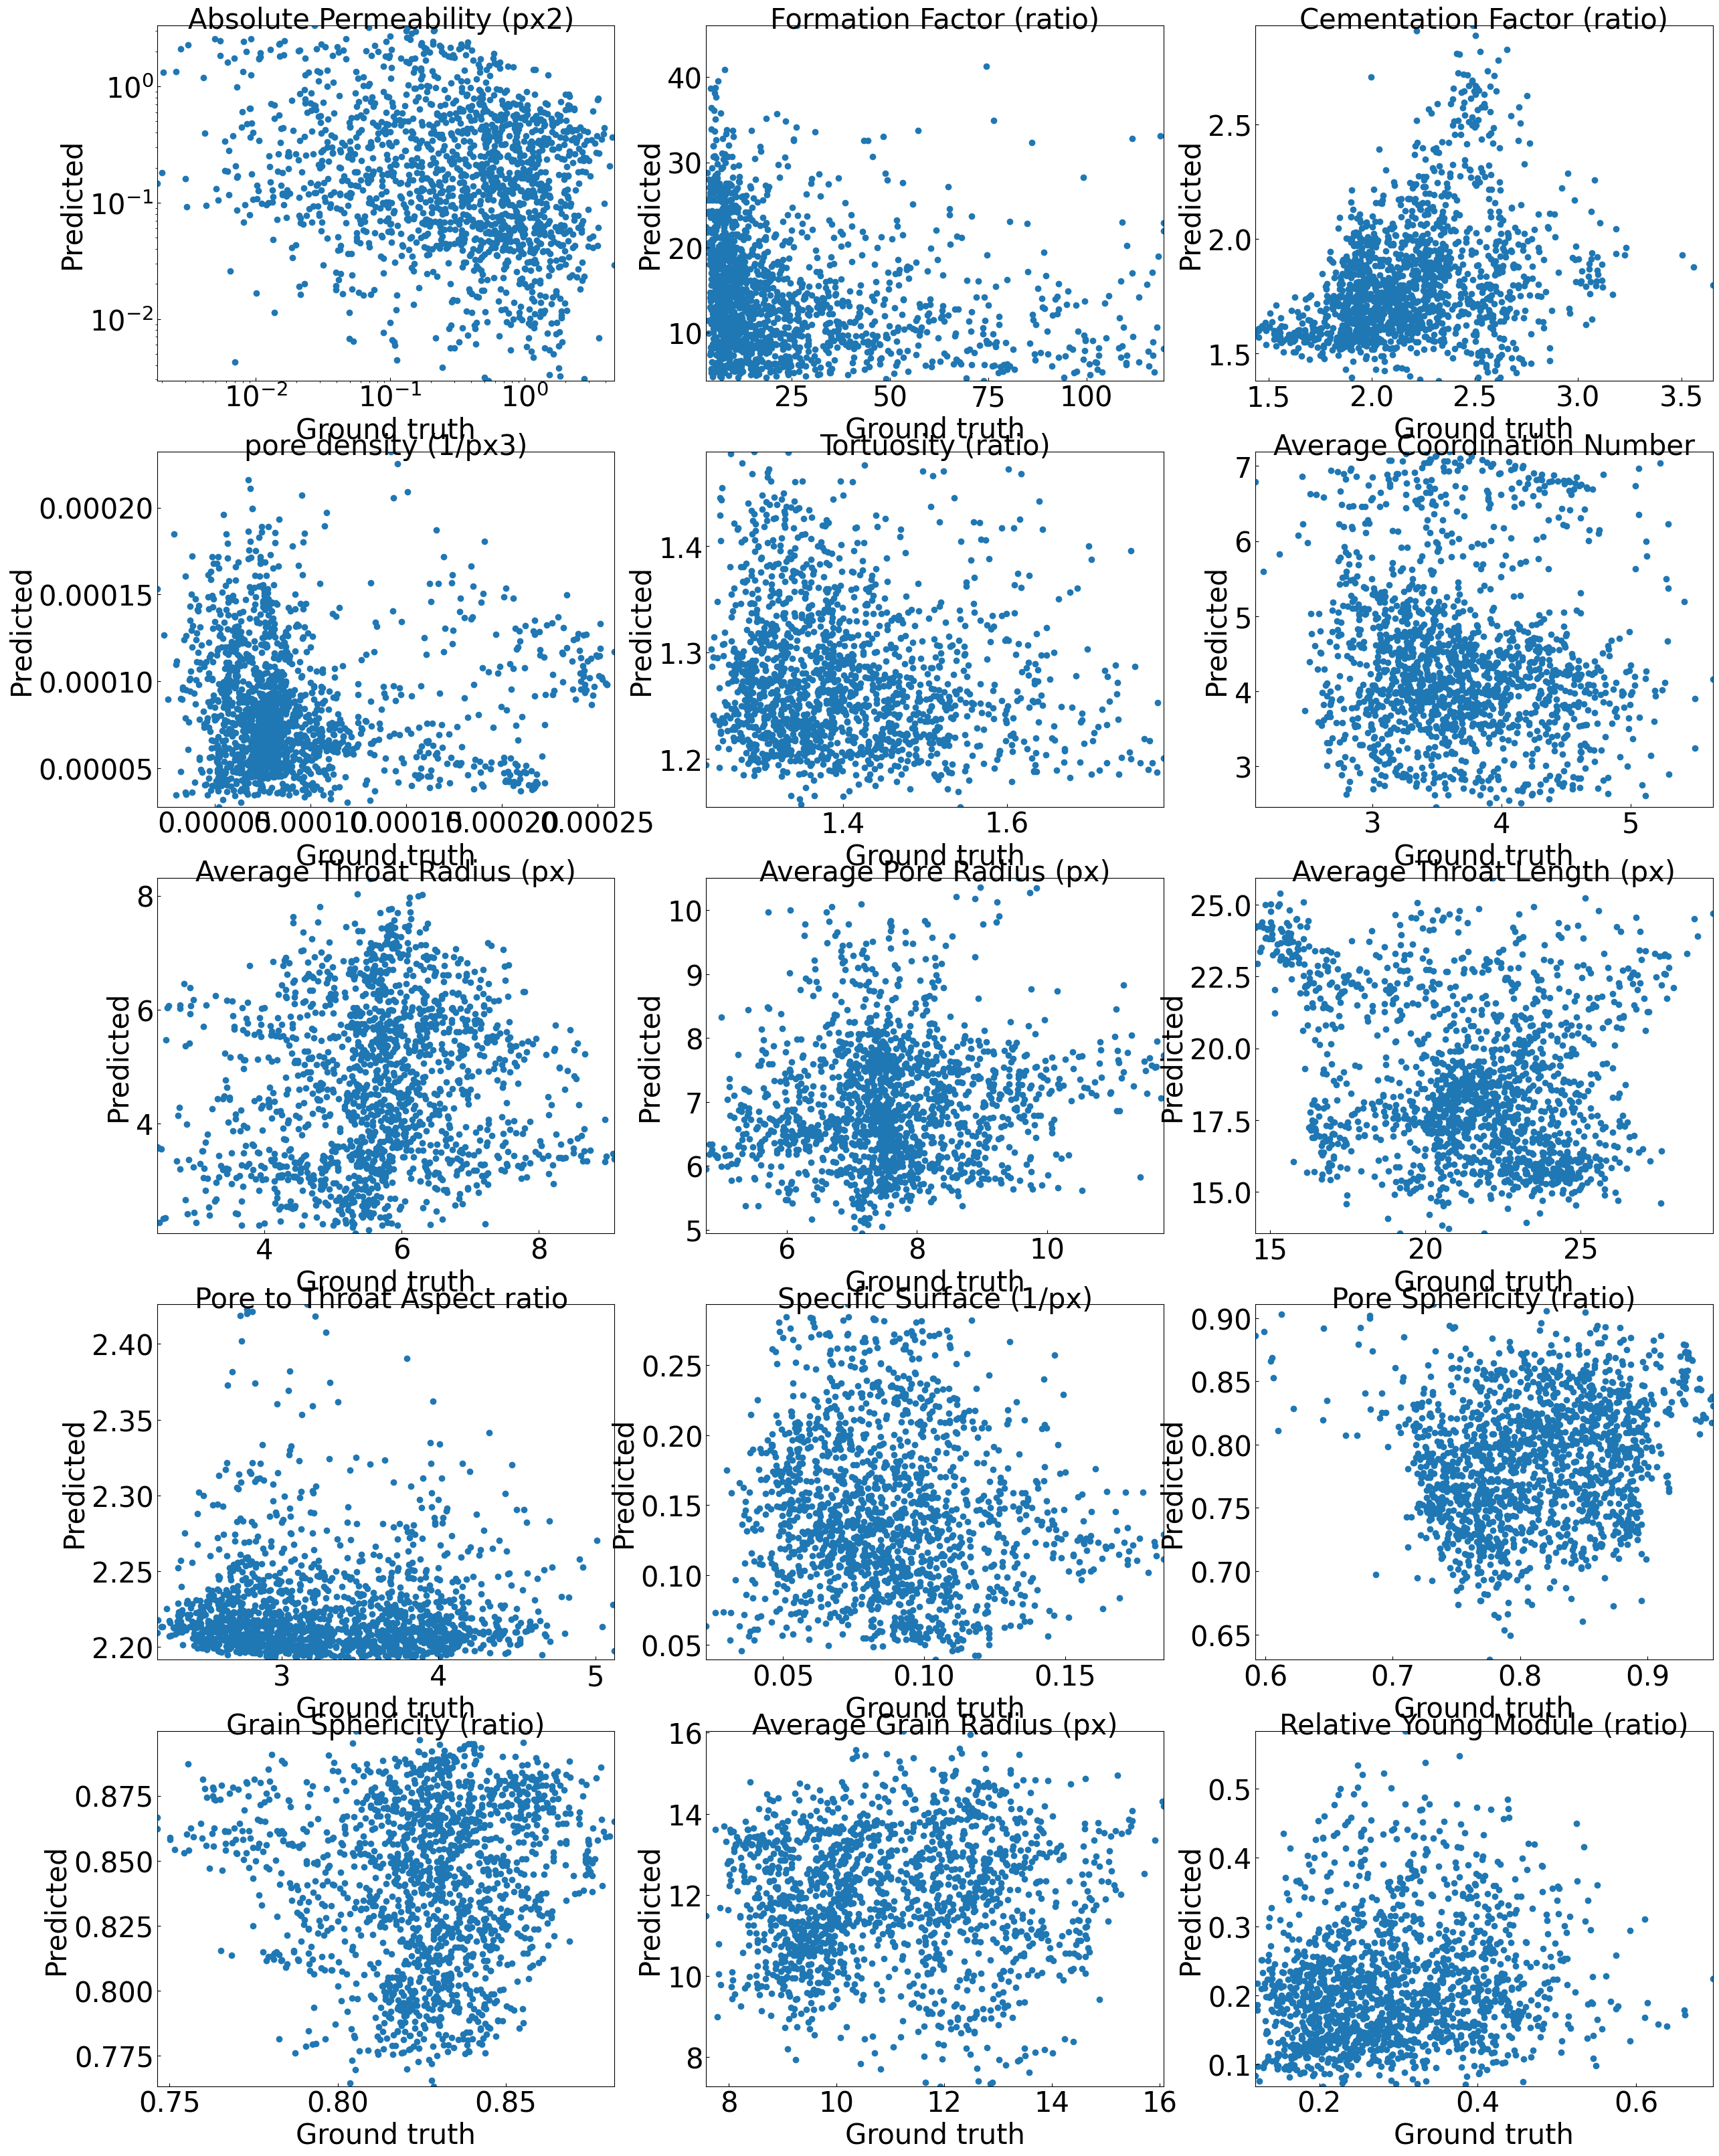

In [3]:
# checking all functions changed work correctly for normal number of properties and slices
List=dpr.prep(dataset_1, 1)
TrainList, EvalList, TestList = dpr.splitdata(List)

model=dpr.trainmodel(dataset_1,TrainList,EvalList,retrain=1,epochs=2,batch_size=100,ModelType=3)
dpr.testmodel(model,dataset_1,TestList)

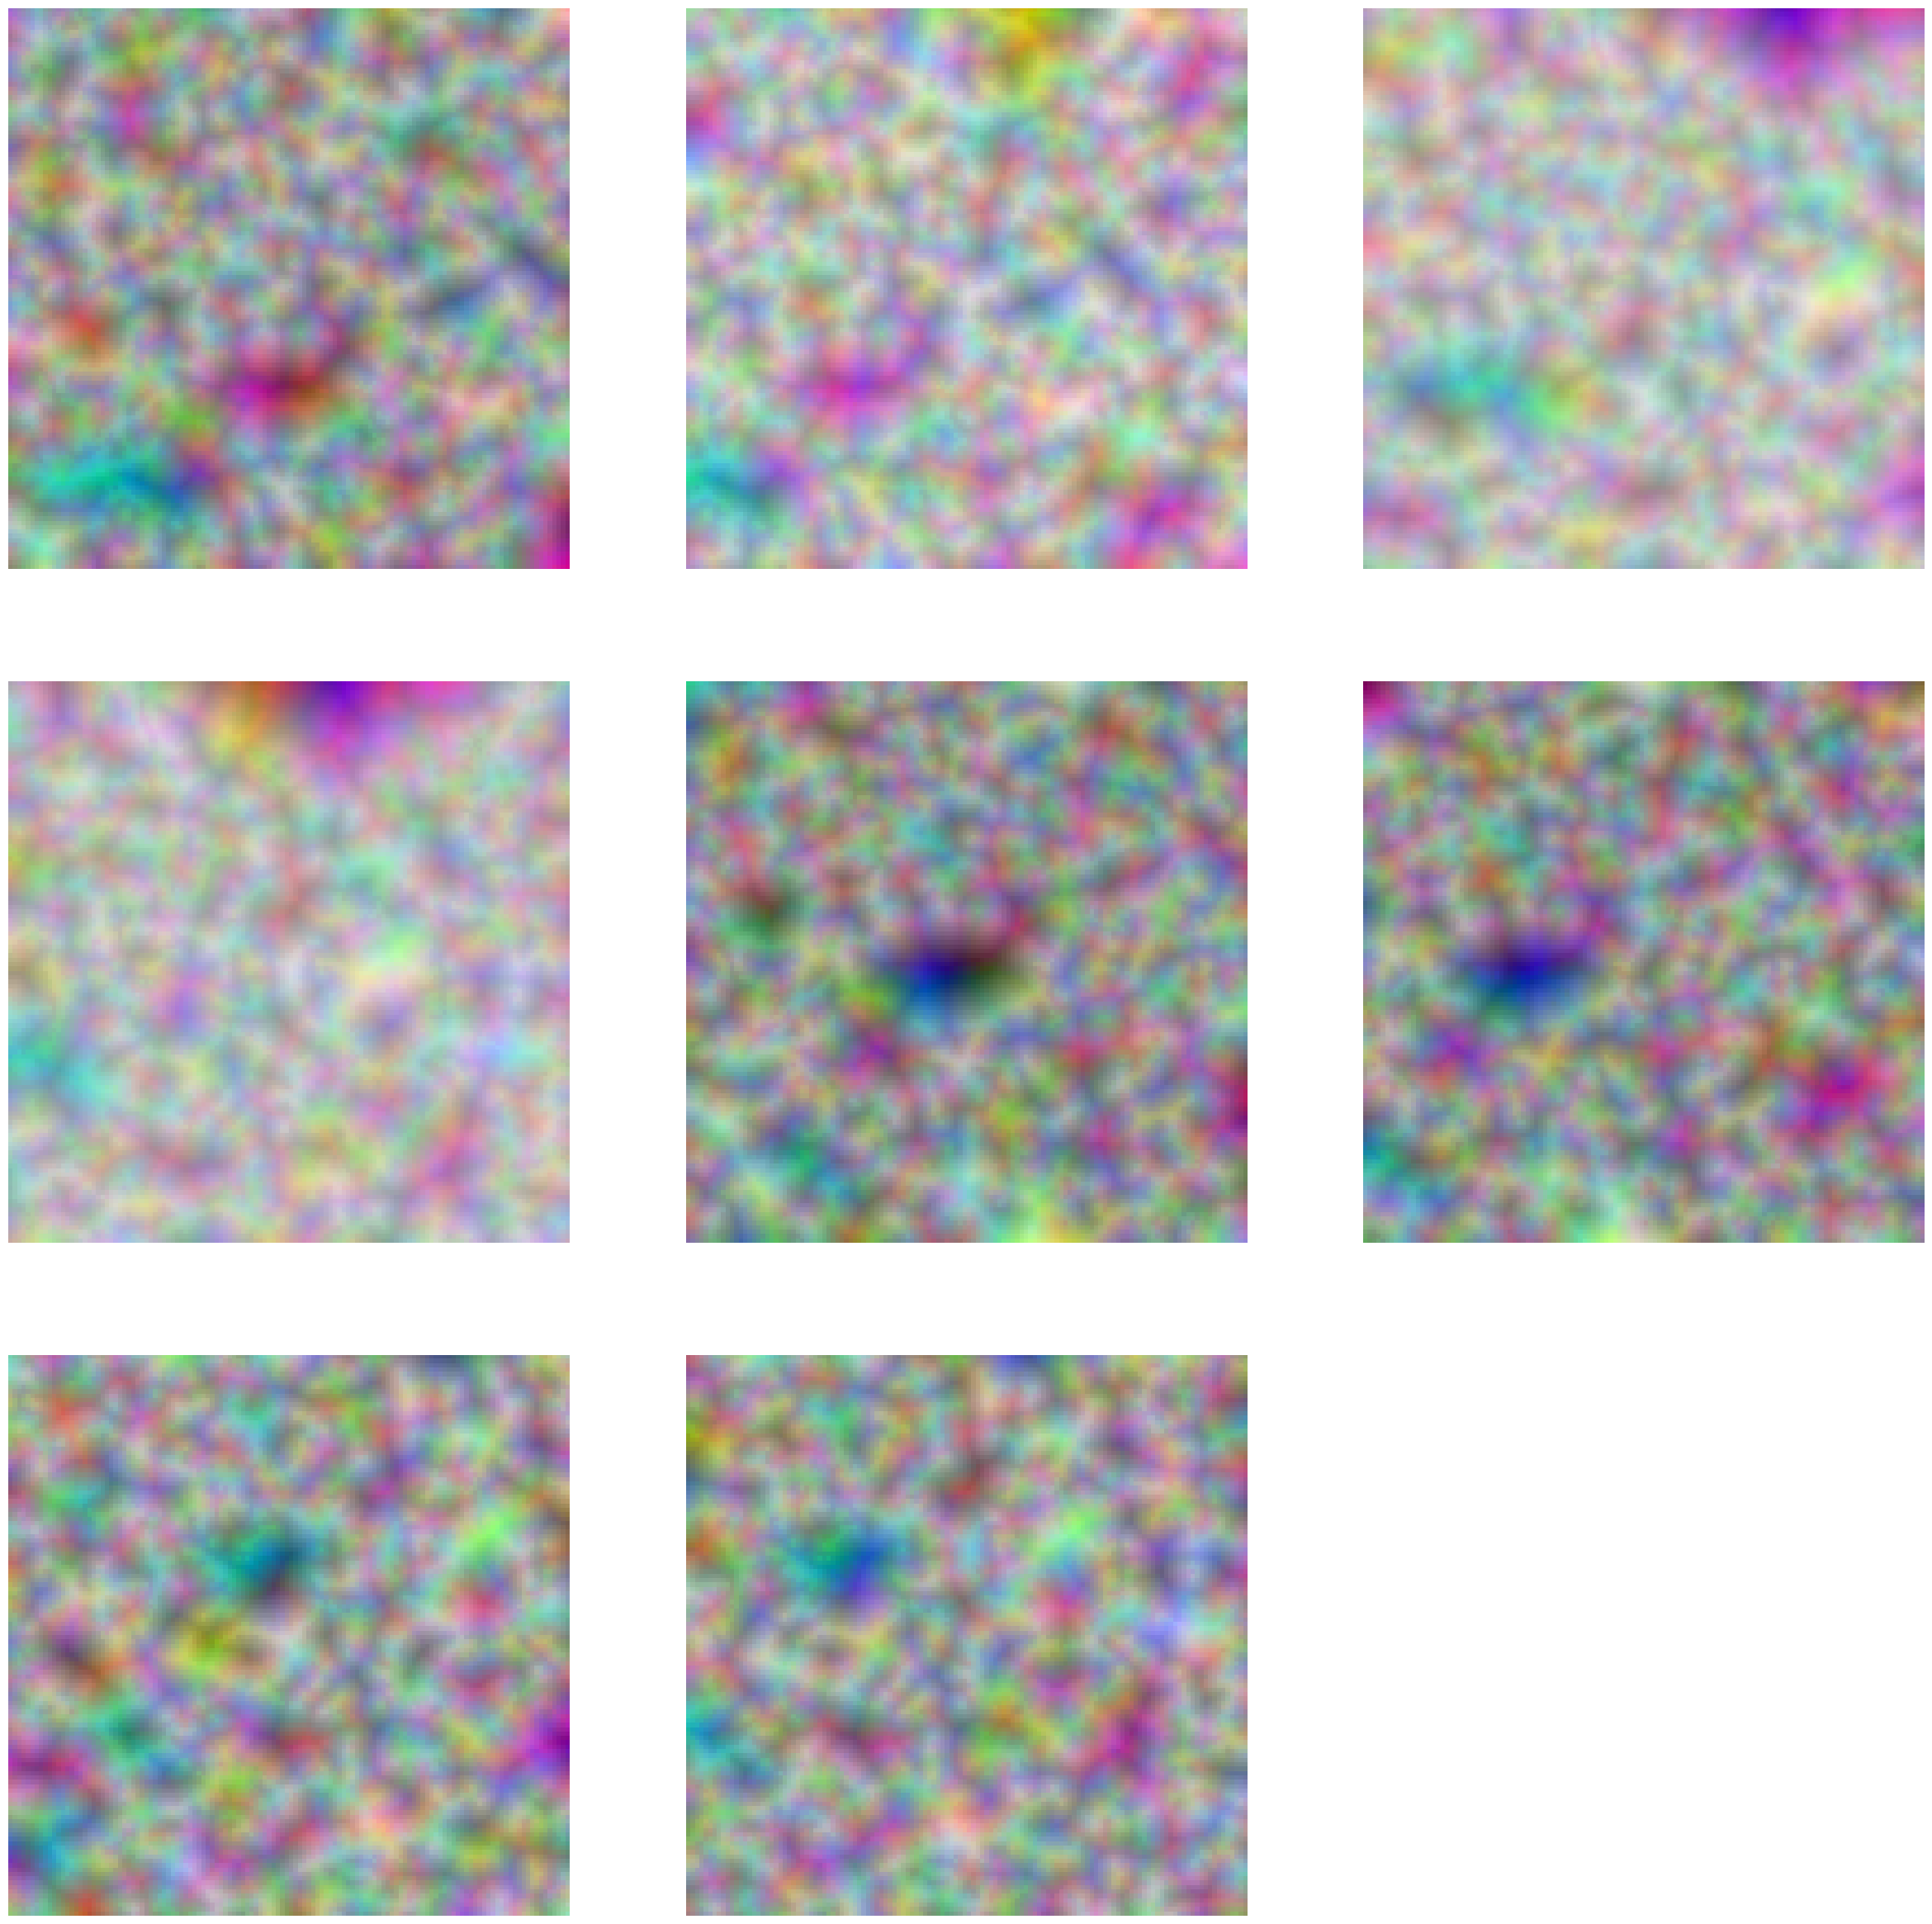

1/1 [==============================] - 0s 79ms/step
(1515,)


DeePore output results including 15 single-value

paramters, 4 functions and 11 distributions

__________________________________________________

        ### Single-value parameters ###

__________________________________________________



Properties                              Value

--------------------------------------------------

Absolute Permeability (um2)             1.885454

Formation Factor (ratio)                24.4985312

Cementation Factor (ratio)              2.1238444

pore density (1/um3)                    1e-06

Tortuosity (ratio)                      1.4277989

Average Coordination Number             3.9922847

Average Throat Radius (um)              18.5624145

Average Pore Radius (um)                34.6329873

Average Throat Length (um)              99.6988871

Pore to Throat Aspect ratio             3.593803

Specific Surface (1/um)                 0.0136606

Pore Sphericity (ratio)               

In [5]:
model = dpr.loadmodel(ModelType=3, n=1)

A=dpr.feedsampledata(FileName="/content/drive/MyDrive/hb-final-project/Data/Sample_large.mat")

dpr.show_feature_maps(A,1)

all_preds=dpr.predict(model, A, n=1, res=4.8)
print(all_preds.shape)
dpr.prettyresult(all_preds,'results.txt')



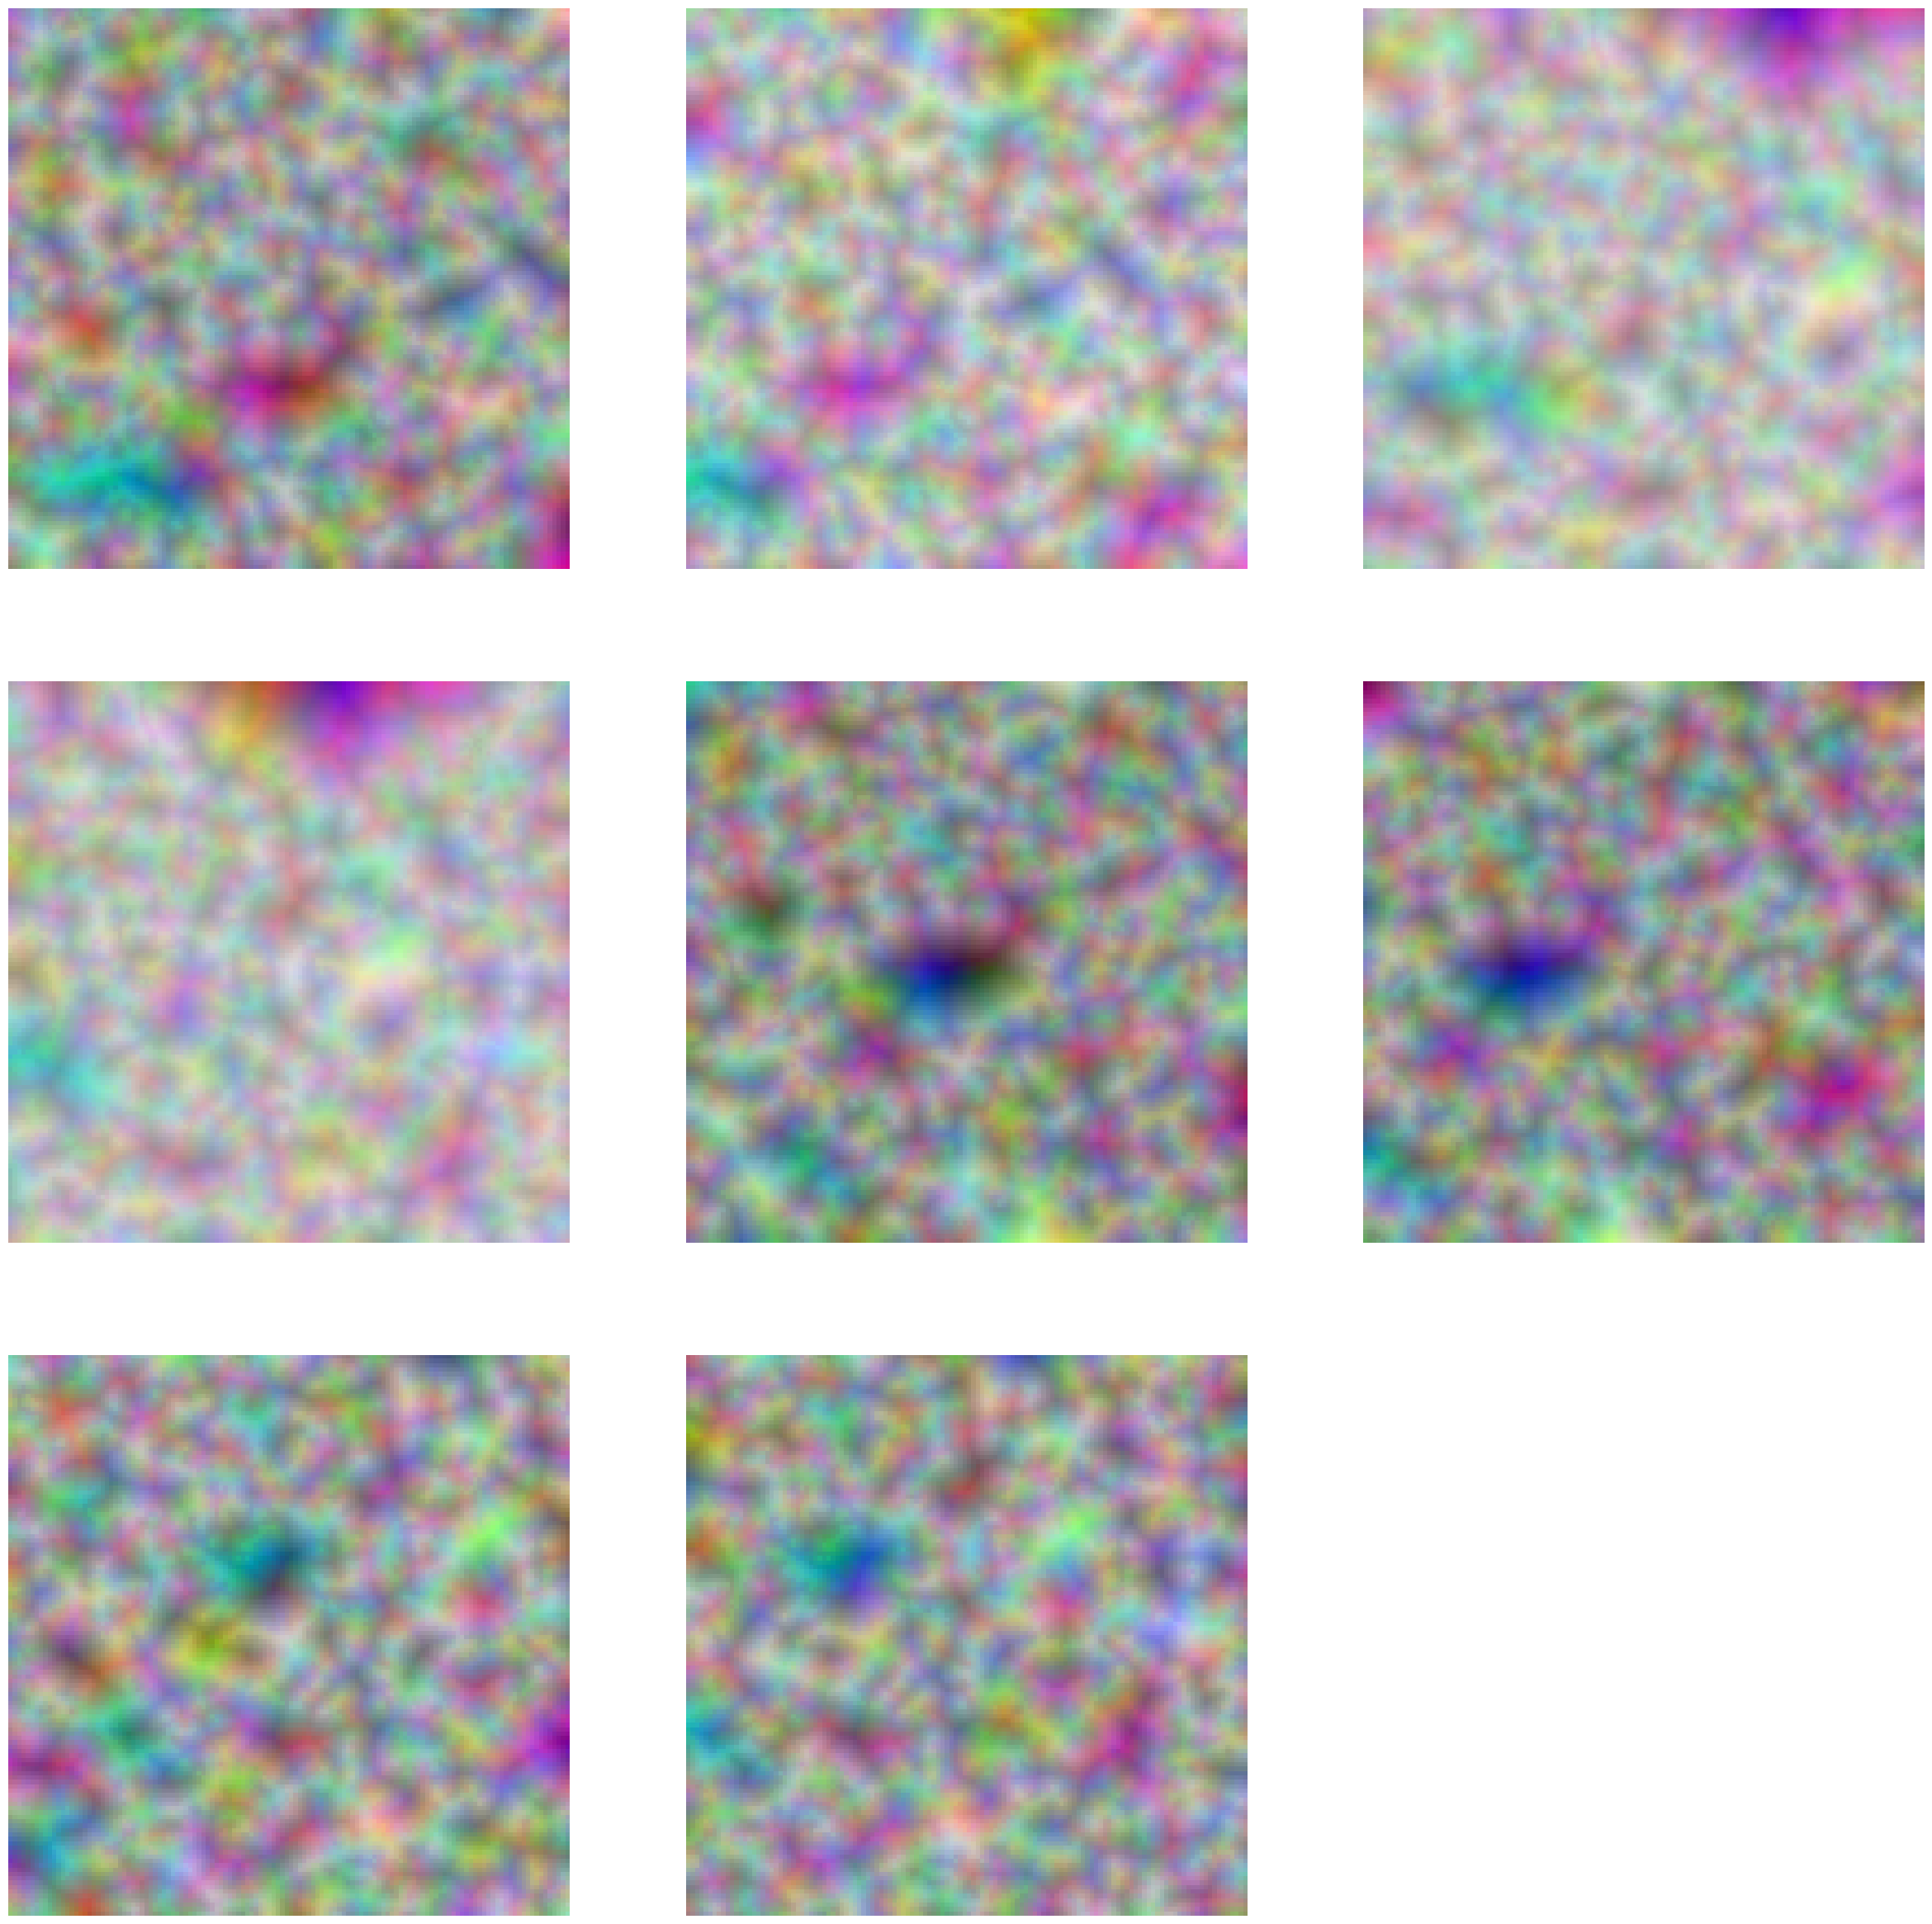

1/1 [==============================] - 0s 70ms/step
(1515,)


DeePore output results including 15 single-value

paramters, 4 functions and 11 distributions

__________________________________________________

        ### Single-value parameters ###

__________________________________________________



Properties                              Value

--------------------------------------------------

Absolute Permeability (um2)             1.9679014

Formation Factor (ratio)                24.5424486

Cementation Factor (ratio)              2.1245174

pore density (1/um3)                    1e-06

Tortuosity (ratio)                      1.4278708

Average Coordination Number             3.9980652

Average Throat Radius (um)              18.5773888

Average Pore Radius (um)                34.6686809

Average Throat Length (um)              99.7164316

Pore to Throat Aspect ratio             3.5949001

Specific Surface (1/um)                 0.0136743

Pore Sphericity (ratio)             

In [6]:

model = dpr.loadmodel(ModelType=3, n=1)

A=dpr.feedsampledata(FileName="/content/drive/MyDrive/hb-final-project/Data/Sample_large.mat")

dpr.show_feature_maps(A,1)

all_preds=dp.predict(model, A, res=4.8)
print(all_preds.shape)
dpr.prettyresult(all_preds,'results.txt')




In [8]:
# checking all functions changed work correctly for just single values
single_props = list(range(15))
List=dpr.prep(dataset_1, 1, properties=single_props)
TrainList, EvalList, TestList = dpr.splitdata(List)

model=dpr.trainmodel(dataset_1,TrainList,EvalList,retrain=1,epochs=2,batch_size=100,ModelType=3, property_num=15)
dpr.testmodel(model,dataset_1,TestList, single_props)

Checking the data for outliers. Please wait...


ValueError: operands could not be broadcast together with shapes (15,1) (1515,1) 